<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [29]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [31]:
## Write your code here

critical_cols = ['Employment', 'JobSat', 'RemoteWork']
missing_counts = df[critical_cols].isnull().sum()
print("Missing values in critical columns:")
print(missing_counts)
# Drop rows missing JobSat
df = df.dropna(subset=['JobSat'])

# For Employment, if missingness is low, drop rows; else fill with 'Unknown'
if missing_counts['Employment'] / len(df) < 0.05:
    df = df.dropna(subset=['Employment'])
else:
    df['Employment'] = df['Employment'].fillna('Unknown')

# For RemoteWork, fill missing with 'Unknown'
df['RemoteWork'] = df['RemoteWork'].fillna('Unknown')

# Verify missing values after handling
print("Missing values after handling:")
print(df[critical_cols].isnull().sum())



Missing values in critical columns:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Missing values after handling:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


In [32]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
10,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,20,NaN,Project manager,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,JavaScript;Python;Ruby,C#;Crystal;Java;JavaScript;Python;Ruby,JavaScript;Python;Ruby,Elasticsearch;MongoDB;PostgreSQL;SQLite,Elasticsearch;MongoDB;PostgreSQL;SQLite,Elasticsearch;MongoDB;PostgreSQL;SQLite,Amazon Web Services (AWS);Google Cloud,Google Cloud,Google Cloud,Node.js;React;Ruby on Rails,Django;Node.js;React;Ruby on Rails,Node.js;React;Ruby on Rails,NaN,NaN,NaN,NaN,NaN,NaN,Ansible;Docker;Kubernetes,Ansible;Docker;Kubernetes,Ansible;Docker;Kubernetes,Visual Studio Code,Visual Studio Code,Visual Studio Code,Windows;Windows Subsystem for Linux (WSL),Windows,Confluence;GitHub Discussions;Jira;Smartsheet,Confluence;GitHub Discussions;Jira,Confluence;GitHub Discussions;Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Discord;Google Meet;Microsoft Teams;Slack;Zoom,ChatGPT;GitHub Copilot;Google Gemini;Meta AI;V...,GitHub Copilot;Google Gemini;Visual Studio Int...,GitHub Copilot;Google Gemini;Visual Studio Int...,Stack Overflow for Teams (private knowledge sh...,A few times per week,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"Yes, definitely",Yes,Favorable,Increase productivity;Speed up learning;Improv...,Somewhat distrust,Neither good or bad at handling complex tasks,Learning about a codebase;Writing code;Documen...,Project planning;Testing code;Generating conte...,Committing and reviewing code;Deployment and m...,NaN,NaN,Learning about a codebase;Writing code;Documen...,NaN,NaN,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers;AI tools lac...,Yes,Individual contributor,15.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Strongly agree,Agree,Neither agree nor disagree,Neither agree nor disagree,3-5 times a

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_4273/2676409977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
/tmp/ipykernel_4273/2676409977.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
/tmp/ipykernel_4273/2676409977.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median

ExperienceRange
0-5      9469
6-10     7737
11-20    6899
21+      3463
Name: count, dtype: int64
  ExperienceRange  JobSat
0             0-5     7.0
1            6-10     7.0
2           11-20     8.0
3             21+     8.0


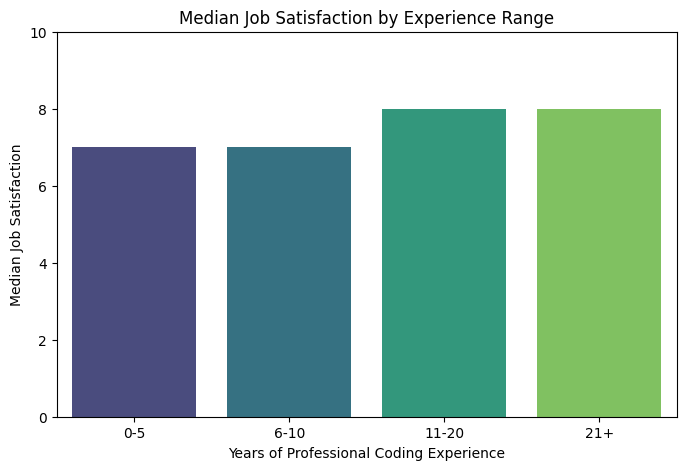

In [35]:
# Define bins and labels for experience ranges
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df = df.dropna(subset=['YearsCodePro'])

bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '6-10', '11-20', '21+']

# Create a new column 'ExperienceRange' categorizing YearsCodePro
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=True, include_lowest=True)

# Optional: check the distribution
print(df['ExperienceRange'].value_counts())

median_jobsat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()

print(median_jobsat)

plt.figure(figsize=(8,5))
sns.barplot(data=median_jobsat, x='ExperienceRange', y='JobSat', palette='viridis')

plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.ylim(0, 10)  # Adjust if your JobSat scale differs
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_4273/2721262341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, palette='coolwarm')


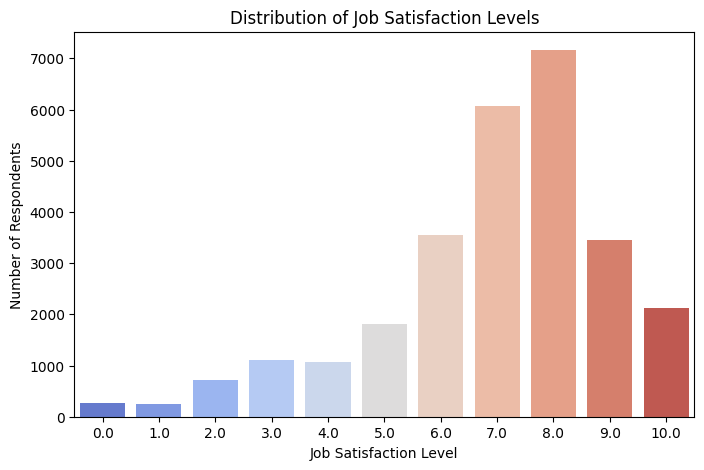

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(x='JobSat', data=df, palette='coolwarm')

plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Number of Respondents')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_4273/3286181617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='Set2')


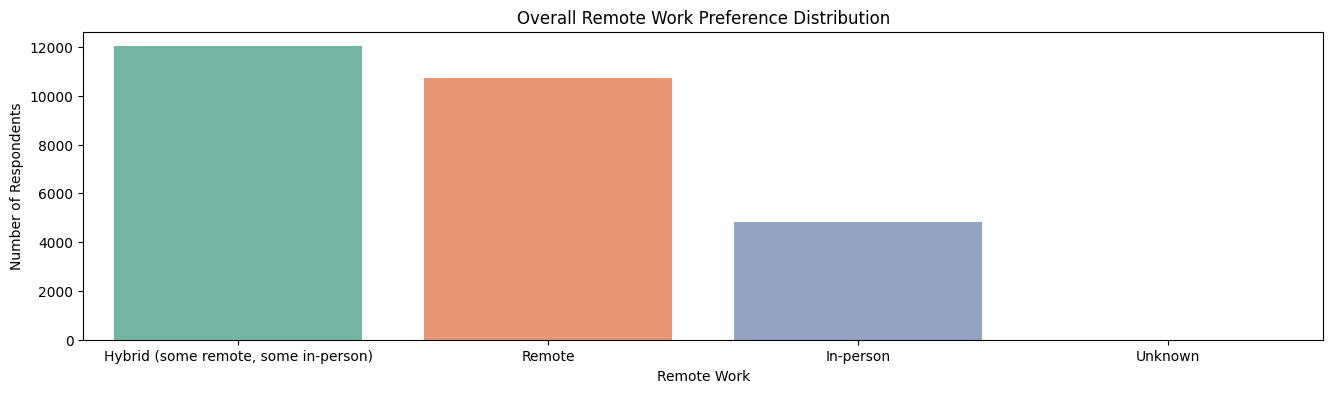

RemoteWork                                                         Hybrid (some remote, some in-person)  \
Employment          DevType                                                                               
Employed, full-time Academic researcher                                                             154   
                    Blockchain                                                                        9   
                    Cloud infrastructure engineer                                                   116   
                    Data engineer                                                                   264   
                    Data or business analyst                                                         83   
                    Data scientist or machine learning specialist                                   216   
                    Database administrator                                                           17   
                    Designer         

In [43]:
plt.figure(figsize=(16,4))
sns.countplot(data=df, x='RemoteWork', palette='Set2')
plt.title('Overall Remote Work Preference Distribution')
plt.xlabel('Remote Work')
plt.ylabel('Number of Respondents')
plt.show()

crosstab = pd.crosstab([df['Employment'], df['DevType']], df['RemoteWork'])
print(crosstab.head(10))  # View first 20 rows


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [53]:
unique_countries = df['Country'].dropna().unique()
print(f"Number of unique countries: {len(unique_countries)}")
print(unique_countries[:20])  # Show first 20 countries


Number of unique countries: 165
['United States of America' 'Switzerland' 'Germany' 'Ireland' 'Italy'
 'Ukraine' 'Japan' 'Brazil' 'Austria' 'Romania'
 'United Kingdom of Great Britain and Northern Ireland' 'Bulgaria'
 'Turkey' 'Croatia' 'Sweden' 'Pakistan' 'Czech Republic'
 'Republic of North Macedonia' 'Finland' 'Slovakia']


/tmp/ipykernel_4273/521390865.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['LanguageHaveWorkedWith'] = region_df['LanguageHaveWorkedWith'].str.split(';')
/tmp/ipykernel_4273/521390865.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_counts.head(15), x='Count', y='Language', palette='coolwarm')


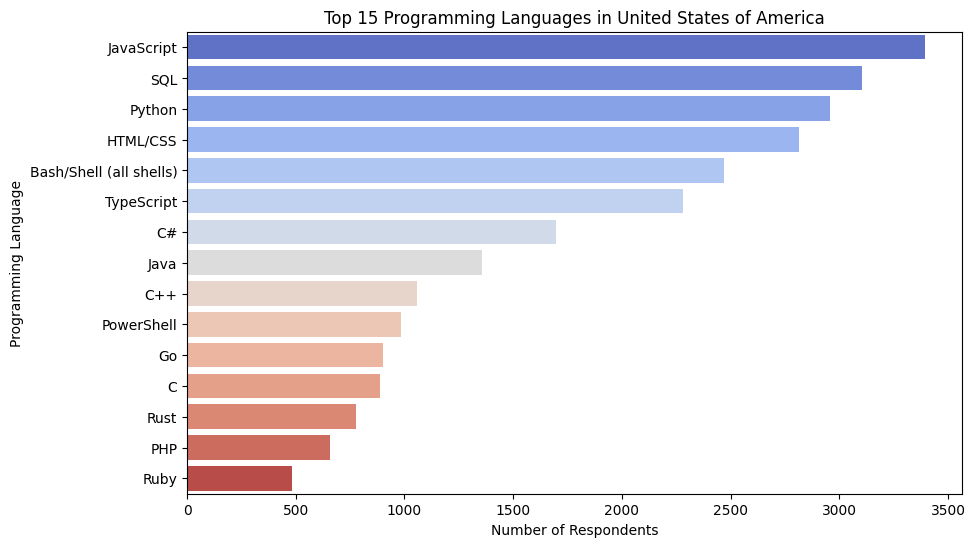

In [55]:
# Drop rows where LanguageHaveWorkedWith is null, and Country is null
lang_df = df.dropna(subset=['LanguageHaveWorkedWith', 'Country']).copy()

# Filter for a specific country, e.g., United States
country_name = 'United States of America'
region_df = lang_df[lang_df['Country'] == country_name]

# Split languages into lists and explode
region_df['LanguageHaveWorkedWith'] = region_df['LanguageHaveWorkedWith'].str.split(';')
lang_exploded = region_df.explode('LanguageHaveWorkedWith')
lang_exploded['LanguageHaveWorkedWith'] = lang_exploded['LanguageHaveWorkedWith'].str.strip()

# Count languages
language_counts = lang_exploded['LanguageHaveWorkedWith'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=language_counts.head(15), x='Count', y='Language', palette='coolwarm')
plt.title(f'Top 15 Programming Languages in {country_name}')
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


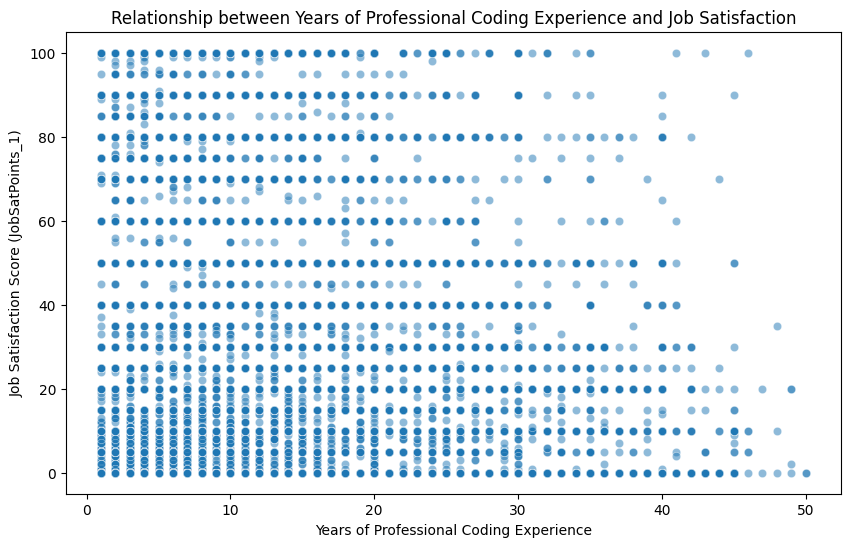

In [56]:
## Write your code here


# First, drop rows with missing values in the relevant columns
df_clean = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1']).copy()

# Convert YearsCodePro to numeric if it isn't already (sometimes it's stored as strings)
df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')

# Drop rows where conversion resulted in NaN
df_clean = df_clean.dropna(subset=['YearsCodePro'])

# Plot scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df_clean, alpha=0.5)

plt.title('Relationship between Years of Professional Coding Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score (JobSatPoints_1)')
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                            0.759479   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                   0.802750   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                0.797033   
Primary/elementary school                                      0.682927   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                 0.822956   
Secondary school (e.g. American high school, Ge...             0.608793   
Some college/university study without earning a...             0.691989   
Something else                                                 0.739623   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

/tmp/ipykernel_4273/1167567950.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


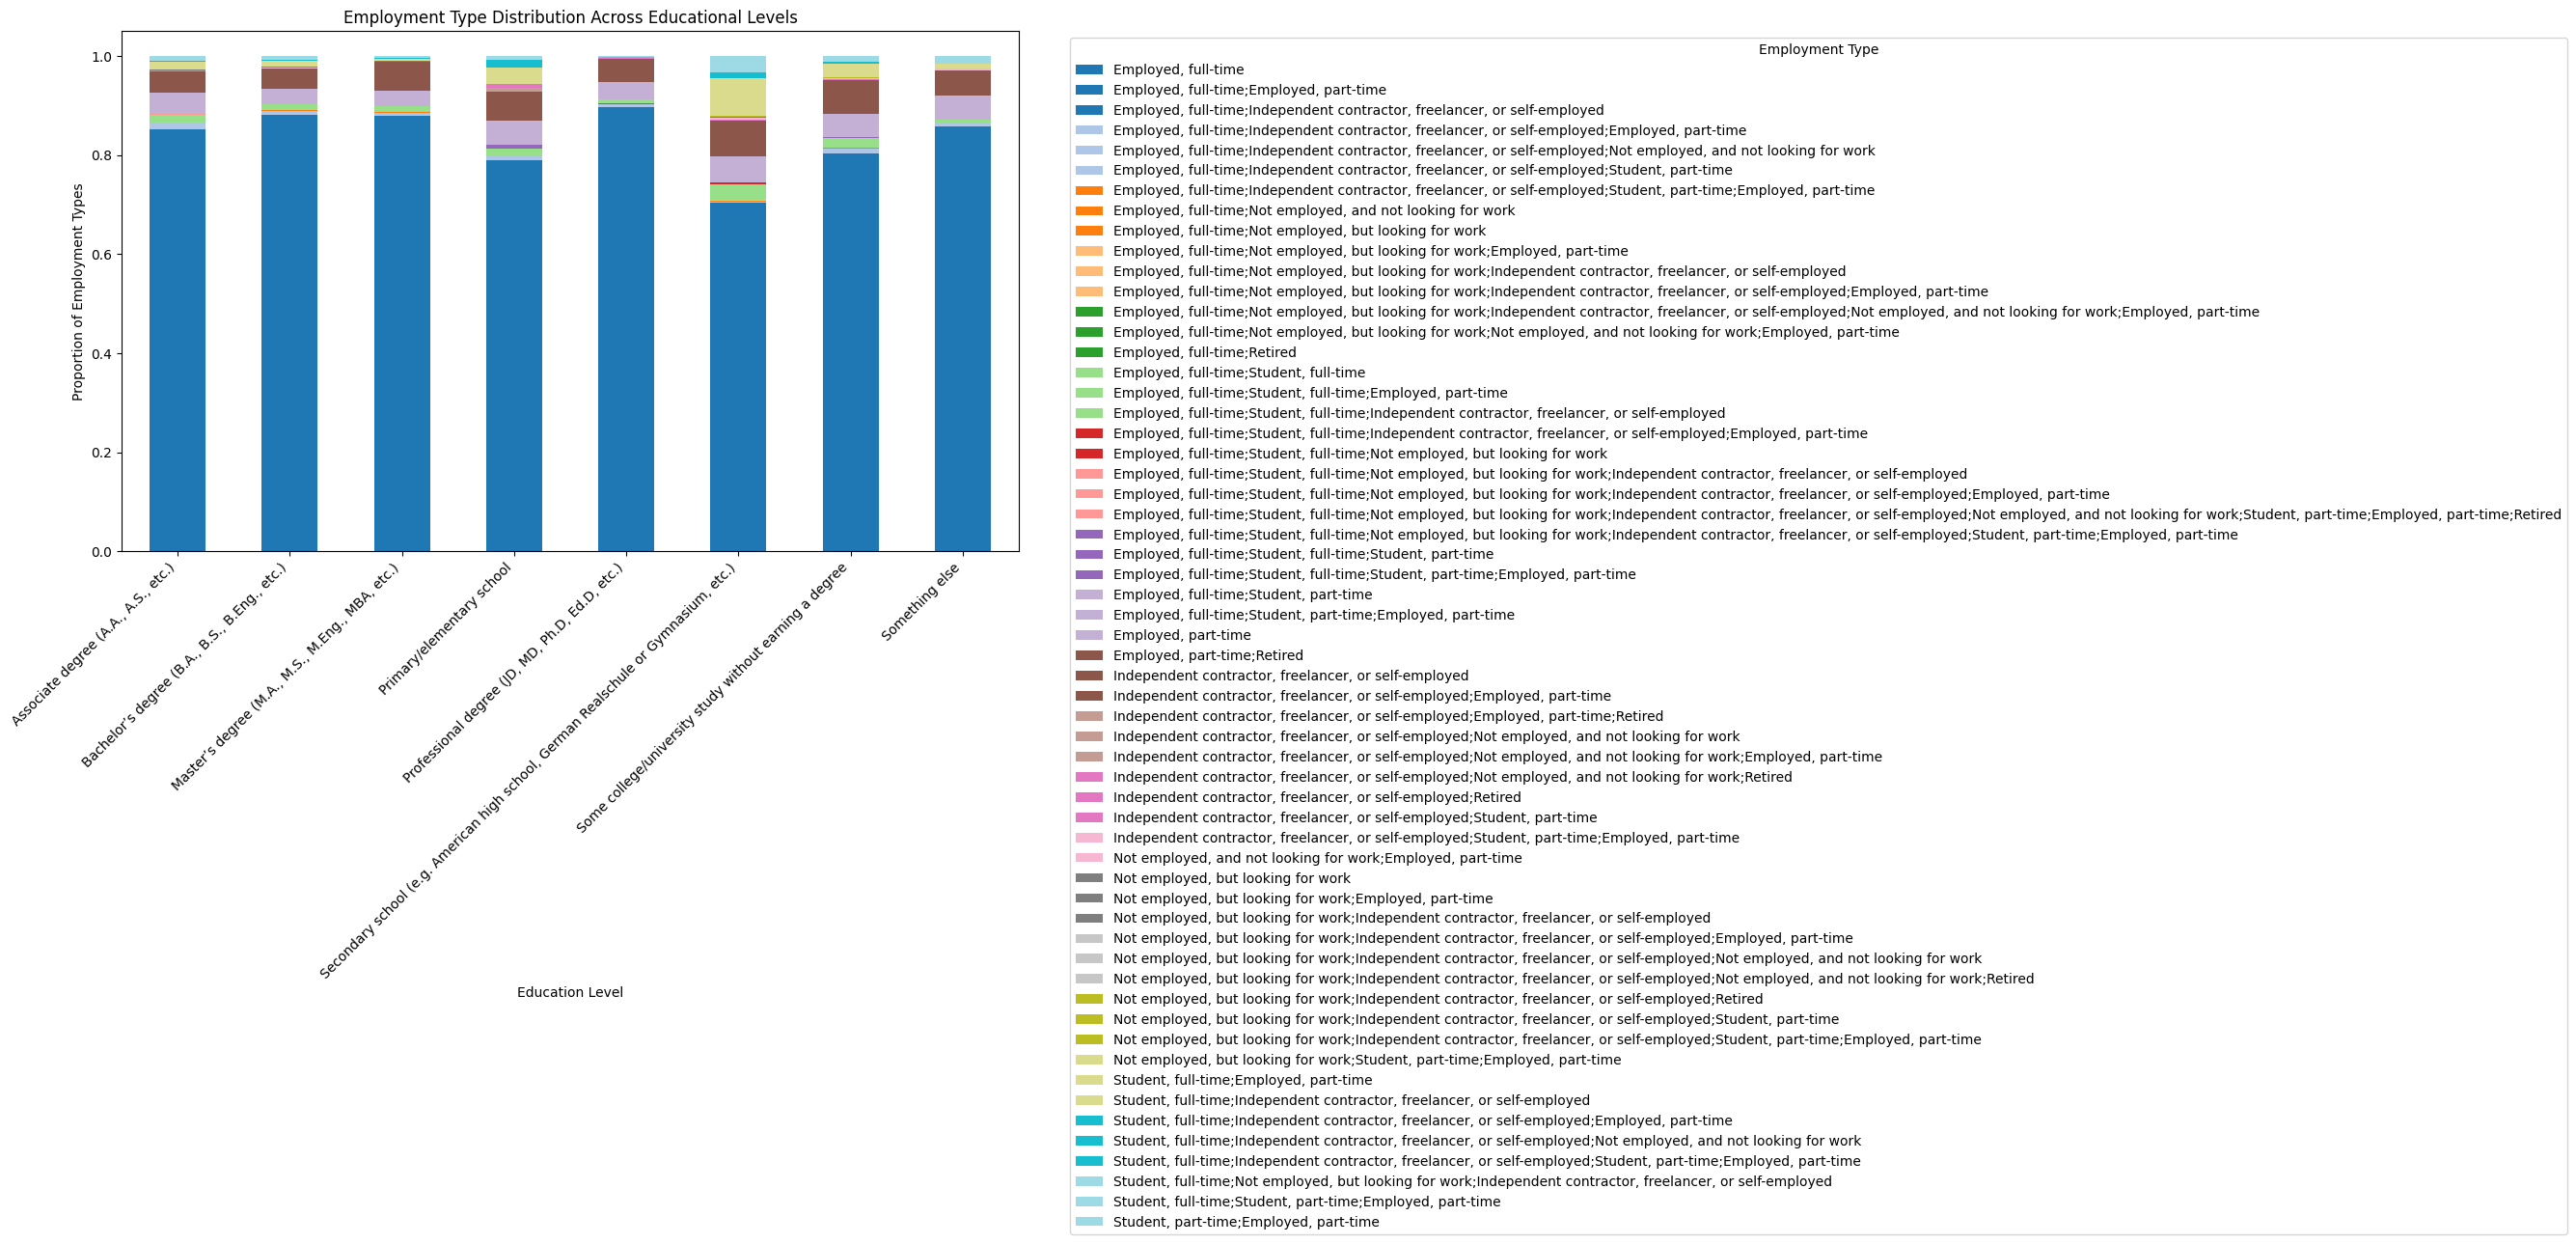

In [57]:
## Write your code here
# Create a cross-tabulation table
edu_emp_crosstab = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index')  # Normalize by row to get proportions

# Show the table
print(edu_emp_crosstab)

import matplotlib.pyplot as plt

# Plot the cross-tab as a stacked bar chart
edu_emp_crosstab.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')

plt.title('Employment Type Distribution Across Educational Levels')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Employment Types')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here
df.to_csv('modified_data.csv', index=False)

print("Modified dataset saved as 'modified_survey_data.csv'")

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
